In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_token_all = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 4., 0., ..., 0., 0., 0.],
       [2., 2., 0., ..., 0., 0., 0.],
       [1., 9., 1., ..., 0., 0., 0.]])

# Calculating the joint probabilty
## The dot product

In [5]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a:', a)
print('b:', b)

a: [1 2 3]
b: [0 5 4]


In [6]:
a.dot(b)
# 1*0 + 2*5 + 3*4 =  0 + 10 + 12 = 22

22

In [7]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('shape of c:', c.shape)
c

shape of c: (3, 2)


array([[0, 6],
       [3, 0],
       [5, 1]])

In [8]:
a.dot(c)

array([21,  9])

In [9]:
# 1*0 + 2*3 + 3*5 = 0 + 6 + 15 = 21
# 1*6 + 2*0 + 3*1 = 6 + 0 + 3 = 9

In [10]:
prob_token_spam.shape

(2500,)

In [11]:
print('shape of the dot product:', X_test.dot(prob_token_spam).shape)

shape of the dot product: (1724,)


# Set the prior
$$ P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)} $$

In [12]:
PROB_SPAM = 0.3116

In [13]:
np.log(prob_token_spam)

array([ -4.40759195,  -5.25366675,  -4.99006919, ...,  -9.26099994,
        -9.38616308, -11.4010661 ])

## Joint probability in log format

In [14]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_token_all)) + np.log(PROB_SPAM)

In [15]:
joint_log_spam[:5]

array([24.28360787,  2.16305488, 20.59344354, 17.75865473, 20.51721085])

In [16]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_token_all)) + np.log(1-PROB_SPAM)

In [17]:
joint_log_ham[:5]

array([-60.9732416 , -11.01142777, -37.96955526, -59.13793992,
       -53.80718869])

In [18]:
joint_log_ham.shape

(1724,)

# Making predictions
## checking for higher joint probability

$$ P(Spam \, | \, X) > \, P(Ham \, | \, X) $$
<br/>
<center> <b>OR</b> </center>
<br/>
$$ P(Spam \, | \, X) < \, P(Ham \, | \, X) $$

In [19]:
prediction = joint_log_spam > joint_log_ham

In [20]:
prediction[14:20]*1

array([1, 1, 1, 1, 1, 1])

In [21]:
y_test[14:20]

array([1., 1., 1., 1., 1., 1.])

In [22]:
# simplifying


joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evaluation
## Accuracy

In [23]:
correct_doc = (y_test == prediction).sum()
print('docs classified correctly:', correct_doc)
numdocs_wrong = X_test.shape[0] - correct_doc
print('docs classified incorrectly:', numdocs_wrong)

docs classified correctly: 1685
docs classified incorrectly: 39


In [24]:
accuracy = correct_doc / (correct_doc + numdocs_wrong)
fraction_wrong = numdocs_wrong / len(X_test)
print('Accuracy of the model: {:.2f}:' .format(accuracy*100))
print('Fraction of emails classified incorrectly: {:.2f}' .format(fraction_wrong*100))

Accuracy of the model: 97.74:
Fraction of emails classified incorrectly: 2.26


## Visualizing the results

In [25]:
# chart styling info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

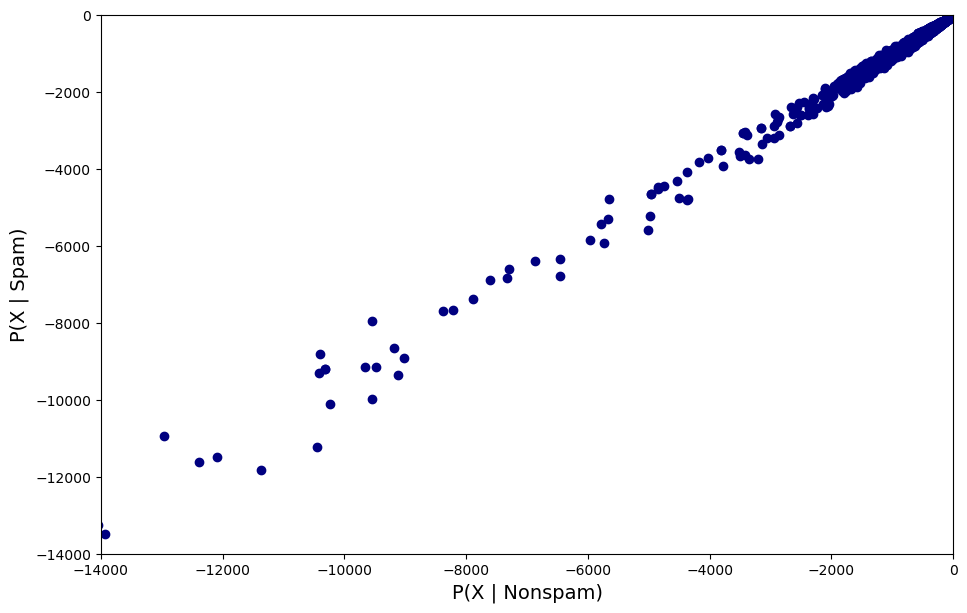

In [26]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, c='navy')
plt.show()

# Decision Boundary 

In [27]:
# chart styling info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

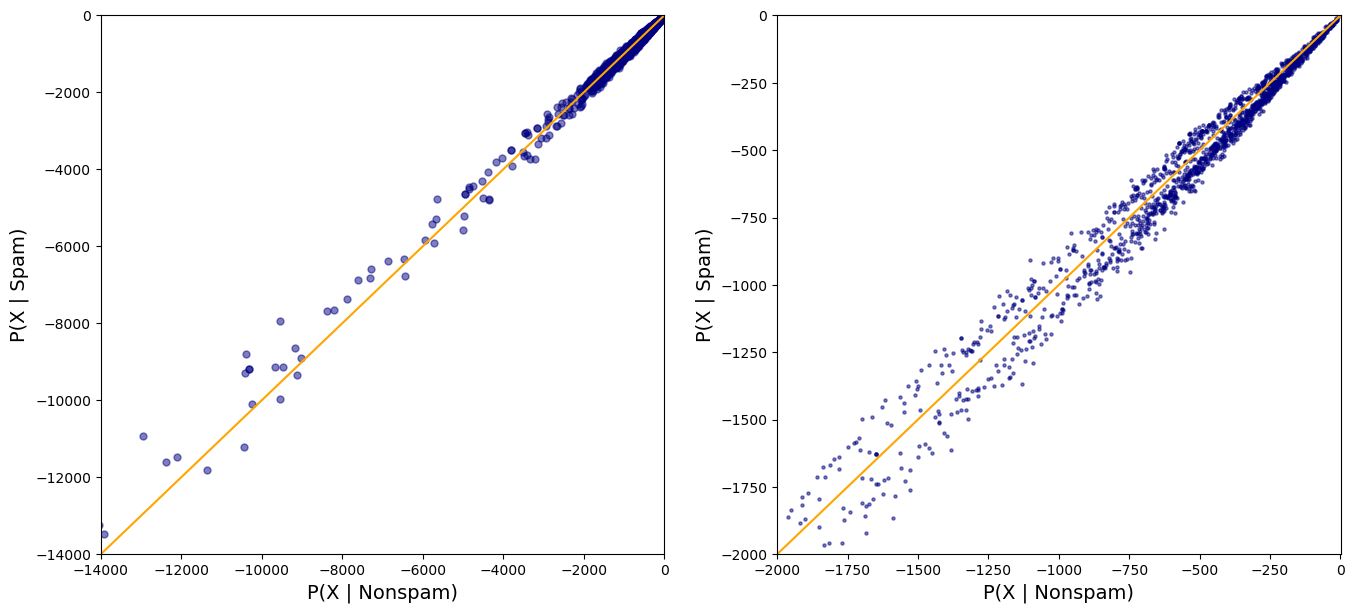

In [28]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, c='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, c='orange')

plt.subplot(1, 2, 2)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, c='navy', alpha=0.5, s=5)
plt.plot(linedata, linedata, c='orange')

plt.show()

In [29]:
# chart styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

C:\Users\BANGLADESH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


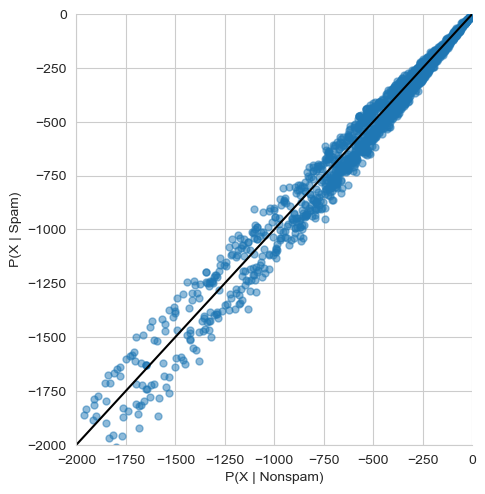

In [30]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, c='black')

C:\Users\BANGLADESH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


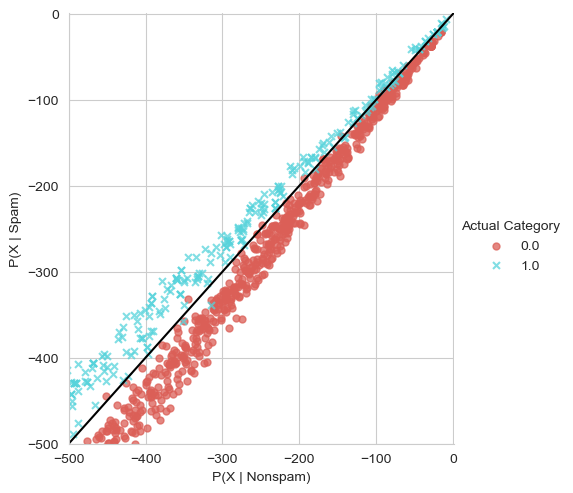

In [32]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, fit_reg=False,
          scatter_kws={'alpha': 0.75, 's': 25}, hue=labels, markers=['o', 'x'],
          palette='hls')

# plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right')

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, c='black')

## False +ve's and -ve's

In [33]:
np.unique(prediction, return_counts=True)  

(array([False,  True]), array([1136,  588], dtype=int64))

In [34]:
true_pos = (y_test == 1) & (prediction == 1)

In [35]:
true_pos.sum()

569

In [36]:
false_pos = (y_test == 0) & (prediction == 1)
# prediction was spam, but actually nonspam
false_pos.sum()

19

In [37]:
true_neg = (y_test == 0) & (prediction == 0)
true_neg.sum()

1116

In [38]:
false_neg = (y_test == 1) & (prediction == 0)
# was actually spam, but predicted as nonspam
false_neg.sum()

20

# Recall Score
$$ \frac {True Positives} {True Positives \, + \, False Negatives} $$

In [39]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}' .format(recall_score))

Recall score is 96.60%


# Precision
$$ \frac {True Positives} {True Positives \, + \, False Positives} $$

In [42]:
# false positive: mon-spam msg that is predicted as spam

precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision is {:.3%}' .format(precision_score))

Precision is 96.769%


# F-Score


In [44]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F-Score is: {:.2%}' .format(f1_score))

F-Score is: 96.69%
